# Pneumonia Detection in CXRs using Computer Vision

#### To aid radiologists in task of detecting pneumonia in Chest X-Rays, AI models could be developed to automate initial detection of potential pneumonia cases in order to prioritize and expedite their review. This project aims to build such a model!</b>

<i>Do read README for the project for consolidated information about the dataset and aim of the project</i>

### In this notebook, we explore the following :-
1. Basic statistics of the dataset using single-variate and multi-variate analysis
2. Properties of the Chest X-Ray images in the dataset like image size, and maximum and minimum value of the pixels
3. Display of X-Ray images corresponding to different categories like position (AP or PA) and class
4. Division of the dataset into train, validation and test for modelling <br>

### Important Conclusions :-
1. There are <b>30,227</b> CXR images, out of which <b>9,555</b> correspond to the presence of pneumonia (~10%)
2. The shape of the image is <b>1024 x 1024</b>
3. The images are already scaled in the range of <b>[0,1]</b>
4. We will keep 2250 separate images for validation and testing and the rest 25K images for training

<i>additional observation / conclusion of each step is explained after the analysis</i>

# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
print("Devices:", tf.config.list_physical_devices()) #GPU presence detected

Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Explore Basic Statistics

### Metadata

In [3]:
df = pd.read_csv('Data/pneumonia/stage2_train_metadata.csv')
df.head()

,patientId,x,y,width,height,Target,class,age,sex,modality,position
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,51,F,CR,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,48,F,CR,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,19,M,CR,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,28,M,CR,PA
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,32,F,CR,AP


The dataset has 11 columns,
1. <b>patientId</b> is a unique identifier for specific patient
2. <b>x, y, width and height</b> correspond to the bounding box coordinate for pneumonia presence in CXR
3. <b>Target</b> is 1 when pnumonia is present, 0 otherwise
4. <b>age</b> and <b>sex</b> refer to the demographic of the patient
5. <b>modality</b> refers to mode using which the image were taken. All values are populated with CR - Computer Radiography
6. <b>position</b> refers to the direction of the X-ray beam relative to the patient's body. <b>AP (anteroposterior)</b>, means the beam enters through the front of the body and exits through the back. <b>PA (posteroanterior)</b> means the beam enters through the back and exits through the front. 

### Single Variate Analysis

In [8]:
print(df.shape)
display(pd.DataFrame(df['Target'].value_counts()))
display(pd.DataFrame(df['class'].value_counts()))
display(pd.DataFrame(df['sex'].value_counts()))
display(pd.DataFrame(df['modality'].value_counts()))
display(pd.DataFrame(df['position'].value_counts()))

(30227, 11)


,count
Target,
0,20672
1,9555


,count
class,
No Lung Opacity / Not Normal,11821
Lung Opacity,9555
Normal,8851


,count
sex,
M,17216
F,13011


,count
modality,
CR,30227


,count
position,
AP,15297
PA,14930


1. There are <b>30,227</b> CXR images, out of which <b>9,555</b> correspond to the presence of pneumonia (~10%)
2. All images correspond to CR modality
3. Entire dataset is split almost equally into AP and PA position

### Multivariate Analysis

In [12]:
display(pd.pivot_table(df,index = 'position', columns = 'Target', values = 'sex',aggfunc = 'count',margins = True))
display(pd.pivot_table(df,index = 'class', columns = 'Target', values = 'sex',aggfunc = 'count',margins = True))

Target,0,1,All
position,,,
AP,7509,7788,15297
PA,13163,1767,14930
All,20672,9555,30227


Target,0,1,All
class,,,
Lung Opacity,NaN,9555.0,9555
No Lung Opacity / Not Normal,11821.0,NaN,11821
Normal,8851.0,NaN,8851
All,20672.0,9555.0,30227


1. For position AP, the split between pneumonia and normal cases is equal. However, that for PA is skewed!
2. All pneumonia cases have class as <b>Lung Opacity</b>

# Explore Images

### Properties of single image

In [65]:
import matplotlib.image as mpimg
img = mpimg.imread('Data/pneumonia/Training/Images/' + df.sample(1)['patientId'].iloc[0] + '.png')

print(img.shape)
print(f'Minimum Pixel Value: {np.min(img)}')
print(f'Maximum Pixel Value: {np.max(img)}')

(1024, 1024)
Minimum Pixel Value: 0.0
Maximum Pixel Value: 0.8549019694328308


1. The shape of the image is <b>1024 x 1024</b>
1. The image is already scaled in the range of <b>[0,1]</b>

### Display Images in Different Categories

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_images(filepaths, main_title=None):

    plt.figure(figsize=(16, 4))
    
    for i, path in enumerate(filepaths):
        path = 'Data/pneumonia/Training/Images/' + path + '.png'
        img = mpimg.imread(path)
        plt.subplot(1, 4, i + 1)
        plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
        plt.axis('off')
    
    if main_title:
        plt.suptitle(main_title, fontsize=16)
    
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()


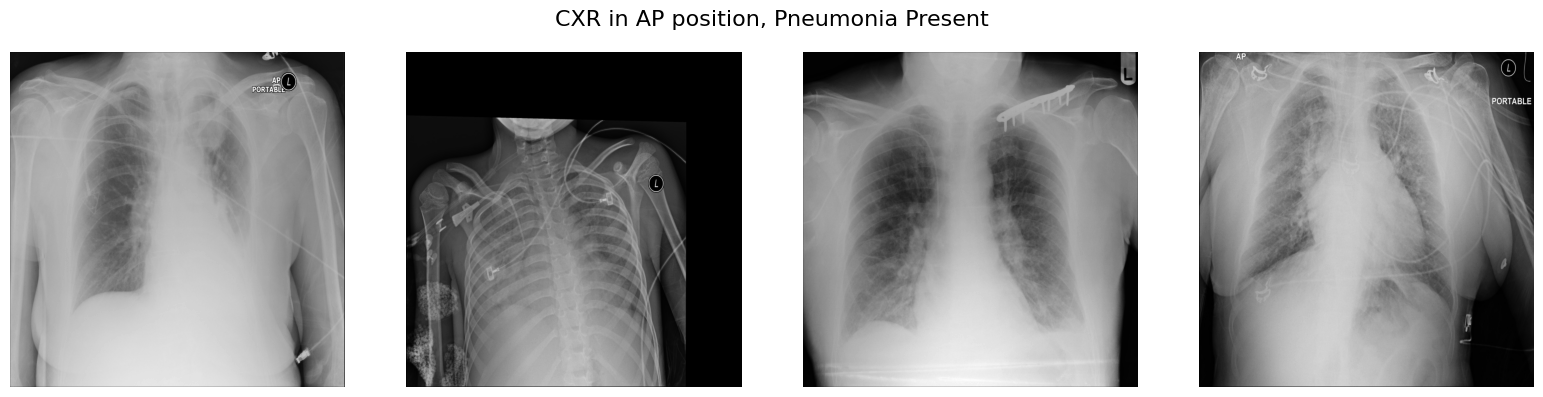

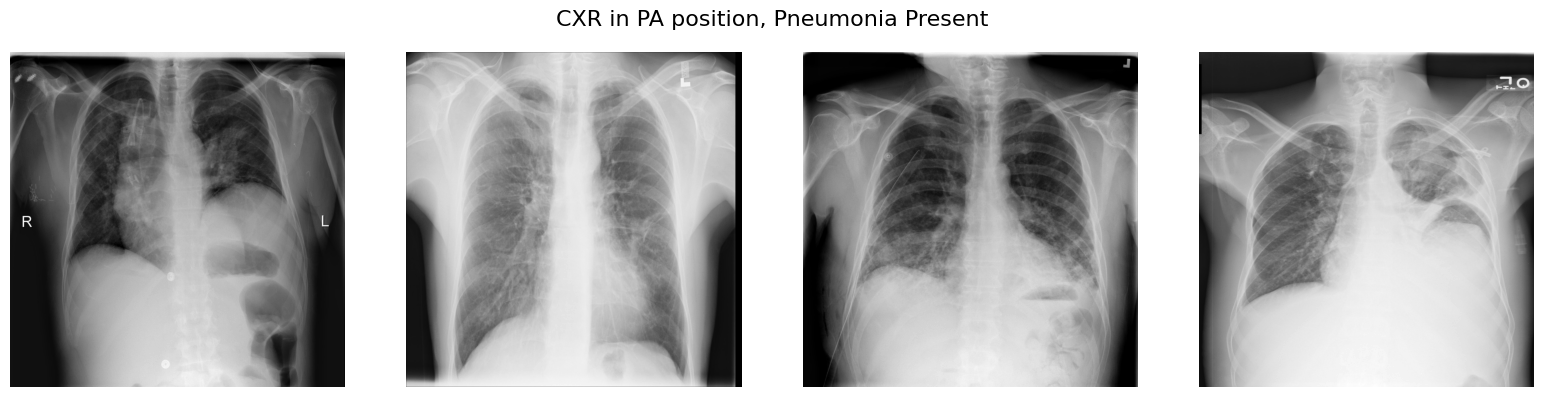

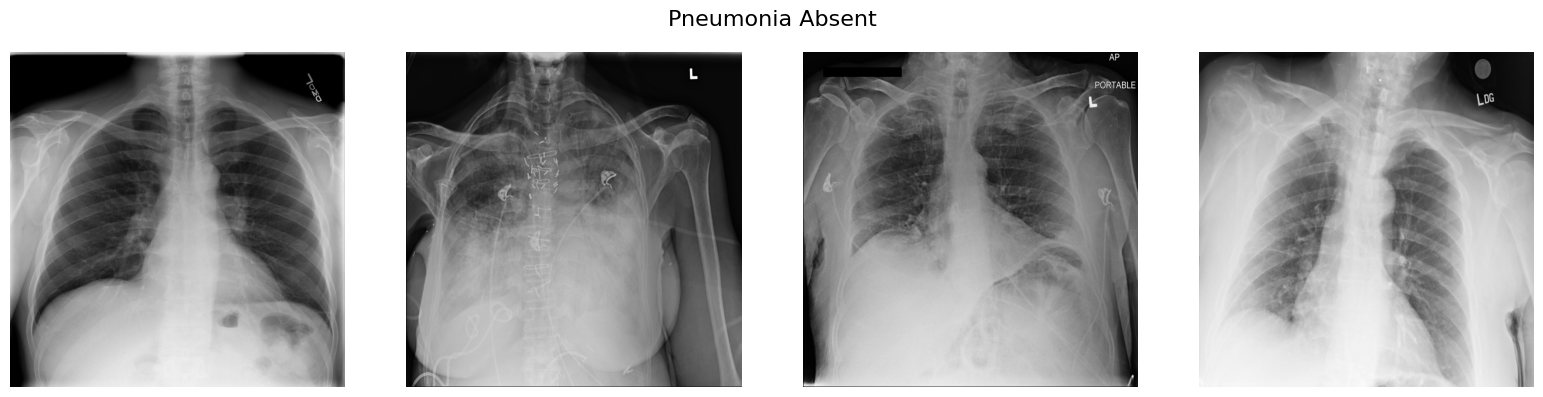

In [43]:
ap_position = df[(df['Target']==1) & (df['position']=='AP')].sample(4)['patientId'].tolist()
plot_images(ap_position, 'CXR in AP position, Pneumonia Present')

pa_position = df[(df['Target']==1) & (df['position']=='PA')].sample(4)['patientId'].tolist()
plot_images(pa_position, 'CXR in PA position, Pneumonia Present')

normal_images = df[(df['Target']==0)].sample(4)['patientId'].tolist()
plot_images(normal_images, 'Pneumonia Absent')

1. In pneumonia cases, the lung opacity is not uniform through out in the CXR
2. In normal cases, we can see that lung opacity of both lungs is almost uniform in the CXR

# Split Dataset into Training, Validation and Testing

- We will keep 2250 samples in validation and 2250 samples for testing the final model
- Rest ~25K samples we will keep for training

In [44]:
from sklearn.model_selection import train_test_split

train_df, validation_test_df = train_test_split(df, test_size = 4500, random_state = 42)
val_df, test_df = train_test_split(validation_test_df, test_size = 0.5, random_state = 42)

print(train_df.shape)
print(val_df.shape)
print(test_df.shape)


(25727, 11)
(2250, 11)
(2250, 11)


In [ ]:
# train_df.to_csv('Data/pneumonia/train_metadata.csv', index = False)
# val_df.to_csv('Data/pneumonia/val_metadata.csv', index = False)
# test_df.to_csv('Data/pneumonia/test_metadata.csv', index = False)